In [156]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import time
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")


def RMSLE(y_predicted, y_true):
    """
    Calculate the expression:
    sqrt(mean((log(1 + y_predicted) - log(1 + y_true)) ** 2))
    """
    y_predicted = np.array(y_predicted)
    y_true = np.array(y_true)

    # Calculate the expression
    expression_result = np.sqrt(np.mean((np.log(1 + y_predicted) - np.log(1 + y_true)) ** 2))
    
    return expression_result


In [157]:
train = pd.read_csv(r'C:\Users\archi\OneDrive\Desktop\Python Projects\Albone Dataset\train.csv')
train.columns = ['id', 'Sex', 'Length', 'Diameter', 'Height', 'Total_W', 'Meat_W', 'Gut_W', 'Shell_W', 'Rings']

In [158]:
train.head()

,id,Sex,Length,Diameter,Height,Total_W,Meat_W,Gut_W,Shell_W,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


### Feature Engineering

#### Actual Total weight

In [159]:
train['Actual_W'] = train['Meat_W'] + train['Gut_W'] + train['Shell_W']
train.head()

,id,Sex,Length,Diameter,Height,Total_W,Meat_W,Gut_W,Shell_W,Rings,Actual_W
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,0.7150
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,1.0545
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,0.0135
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,0.8310
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,0.7270


In [160]:
train = train.drop(['Total_W'], axis = 1)

In [161]:
train.head()

,id,Sex,Length,Diameter,Height,Meat_W,Gut_W,Shell_W,Rings,Actual_W
0,0,F,0.550,0.430,0.150,0.3285,0.1465,0.2400,11,0.7150
1,1,F,0.630,0.490,0.145,0.4580,0.2765,0.3200,11,1.0545
2,2,I,0.160,0.110,0.025,0.0055,0.0030,0.0050,6,0.0135
3,3,M,0.595,0.475,0.150,0.3755,0.2055,0.2500,10,0.8310
4,4,I,0.555,0.425,0.130,0.3695,0.1600,0.1975,9,0.7270


In [162]:
train = train.drop(['Sex', 'id'], axis = 1)

In [163]:
train

,Length,Diameter,Height,Meat_W,Gut_W,Shell_W,Rings,Actual_W
0,0.550,0.430,0.150,0.3285,0.1465,0.2400,11,0.7150
1,0.630,0.490,0.145,0.4580,0.2765,0.3200,11,1.0545
2,0.160,0.110,0.025,0.0055,0.0030,0.0050,6,0.0135
3,0.595,0.475,0.150,0.3755,0.2055,0.2500,10,0.8310
4,0.555,0.425,0.130,0.3695,0.1600,0.1975,9,0.7270
...,...,...,...,...,...,...,...,...
90610,0.335,0.235,0.075,0.0685,0.0370,0.0450,6,0.1505
90611,0.555,0.425,0.150,0.3865,0.1815,0.2400,9,0.8080
90612,0.435,0.330,0.095,0.1510,0.0785,0.0815,6,0.3110
90613,0.345,0.270,0.075,0.0980,0.0490,0.0700,6,0.2170


In [164]:
cols = list(train.columns)
cols.pop(6)

'Rings'

In [165]:
train_x = train

#### Creating Polynomial Features

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

train_poly = poly.fit_transform(train_x)

# Get the names of the new polynomial features
feature_names_poly = poly.get_feature_names(cols)
train_x = pd.DataFrame(train_poly, columns = feature_names_poly)

In [12]:
new_list = []
for x in list(train_x.columns):
    x = x.replace(" ","_times_")
    x = x.replace("^", "_")
    new_list.append(x)
    
train_x.columns = new_list
train_x.head()

,Length,Diameter,Height,Meat_W,Gut_W,Shell_W,Actual_W,Length_2,Length_times_Diameter,Length_times_Height,...,Meat_W_2,Meat_W_times_Gut_W,Meat_W_times_Shell_W,Meat_W_times_Actual_W,Gut_W_2,Gut_W_times_Shell_W,Gut_W_times_Actual_W,Shell_W_2,Shell_W_times_Actual_W,Actual_W_2
0,0.550,0.430,0.150,0.3285,0.1465,0.2400,0.7150,0.302500,0.236500,0.08250,...,0.107912,0.048125,0.078840,0.234877,0.021462,0.035160,0.104747,0.057600,0.171600,0.511225
1,0.630,0.490,0.145,0.4580,0.2765,0.3200,1.0545,0.396900,0.308700,0.09135,...,0.209764,0.126637,0.146560,0.482961,0.076452,0.088480,0.291569,0.102400,0.337440,1.111970
2,0.160,0.110,0.025,0.0055,0.0030,0.0050,0.0135,0.025600,0.017600,0.00400,...,0.000030,0.000016,0.000027,0.000074,0.000009,0.000015,0.000041,0.000025,0.000068,0.000182
3,0.595,0.475,0.150,0.3755,0.2055,0.2500,0.8310,0.354025,0.282625,0.08925,...,0.141000,0.077165,0.093875,0.312040,0.042230,0.051375,0.170770,0.062500,0.207750,0.690561
4,0.555,0.425,0.130,0.3695,0.1600,0.1975,0.7270,0.308025,0.235875,0.07215,...,0.136530,0.059120,0.072976,0.268626,0.025600,0.031600,0.116320,0.039006,0.143583,0.528529


In [166]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_2 = scaler.fit_transform(train_x)
train_2 = pd.DataFrame(train_2, columns=train_x.columns)

In [167]:
pca = PCA(n_components = 1).fit_transform(train_x)
#print(pca.explained_variance_ratio_)
train_x['PC_1'] = pca[:,0]


In [169]:
train_x

,Length,Diameter,Height,Meat_W,Gut_W,Shell_W,Rings,Actual_W,PC_1
0,0.550,0.430,0.150,0.3285,0.1465,0.2400,11,0.7150,1.296007
1,0.630,0.490,0.145,0.4580,0.2765,0.3200,11,1.0545,1.335757
2,0.160,0.110,0.025,0.0055,0.0030,0.0050,6,0.0135,-3.772966
3,0.595,0.475,0.150,0.3755,0.2055,0.2500,10,0.8310,0.315354
4,0.555,0.425,0.130,0.3695,0.1600,0.1975,9,0.7270,-0.692782
...,...,...,...,...,...,...,...,...,...
90610,0.335,0.235,0.075,0.0685,0.0370,0.0450,6,0.1505,-3.750930
90611,0.555,0.425,0.150,0.3865,0.1815,0.2400,9,0.8080,-0.683836
90612,0.435,0.330,0.095,0.1510,0.0785,0.0815,6,0.3110,-3.728878
90613,0.345,0.270,0.075,0.0980,0.0490,0.0700,6,0.2170,-3.742655


In [103]:
# sns.scatterplot(data=train_x, x = train_x['PC_1'], y =train_x['PC_2'] )

In [149]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.20, random_state = 42)

In [180]:
from statsmodels.formula.api import ols
us_house_reg = ols('Rings ~ PC_1', data = train_x).fit()
print(us_house_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.470e+08
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:03:08   Log-Likelihood:             1.6114e+05
No. Observations:               90615   AIC:                        -3.223e+05
Df Residuals:                   90613   BIC:                        -3.223e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6968      0.000   7.14e+04      0.0

NameError: name 'us_house' is not defined

In [133]:
# model = LinearRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print(RMSLE(y_test, y_pred))

In [134]:
model.fit(tra)

NameError: name 'tra' is not defined

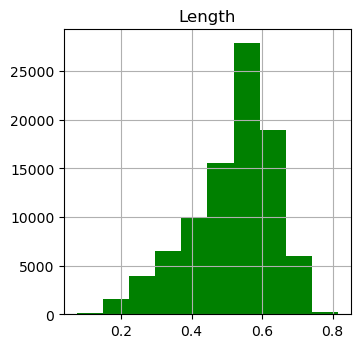

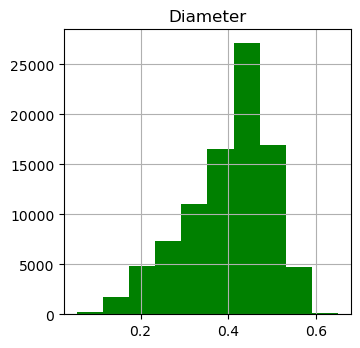

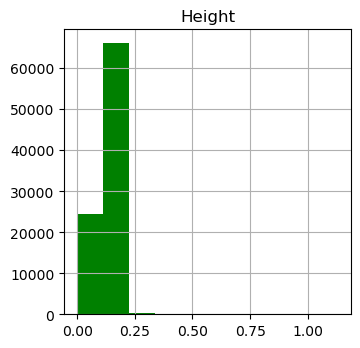

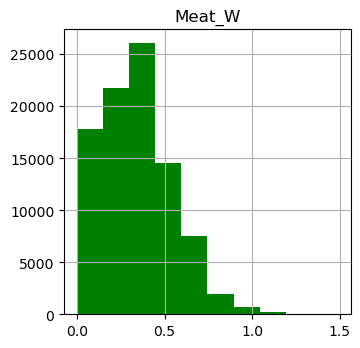

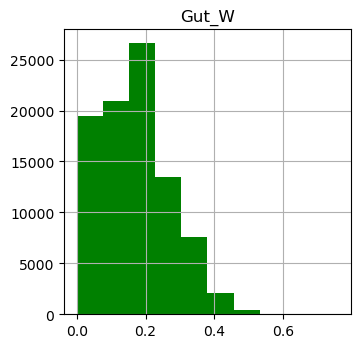

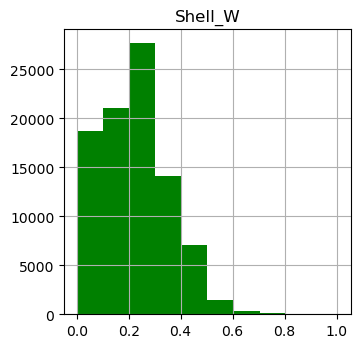

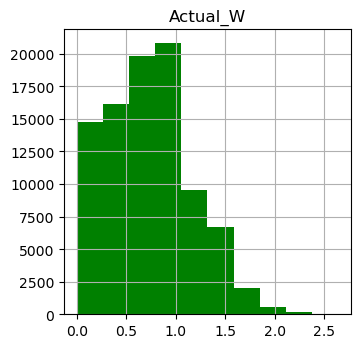

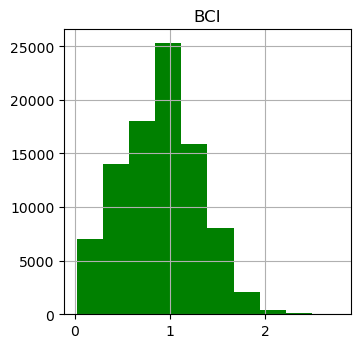

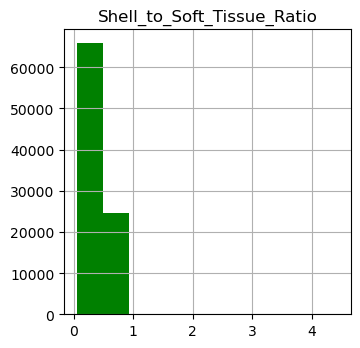

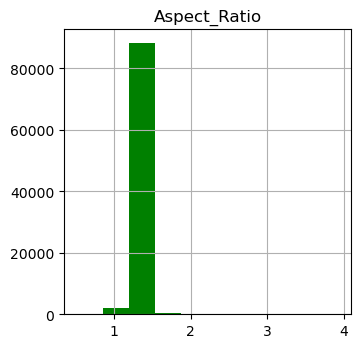

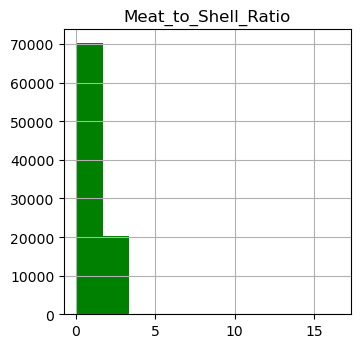

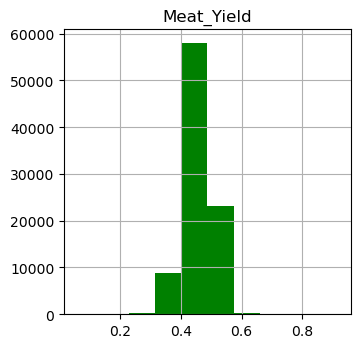

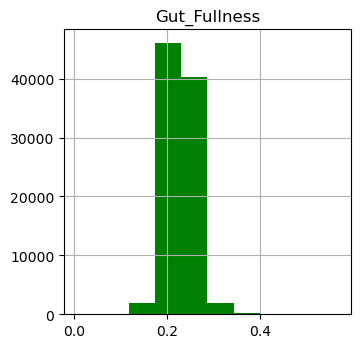

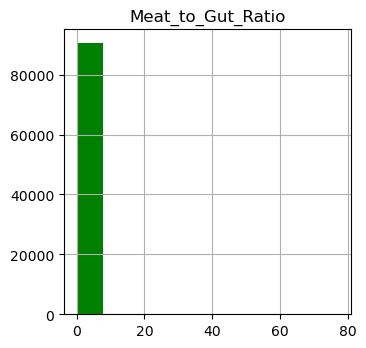

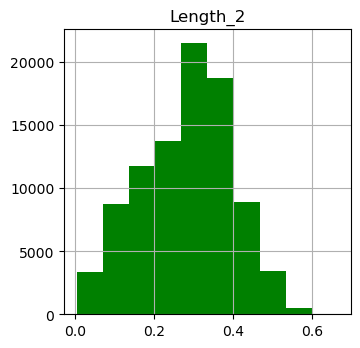

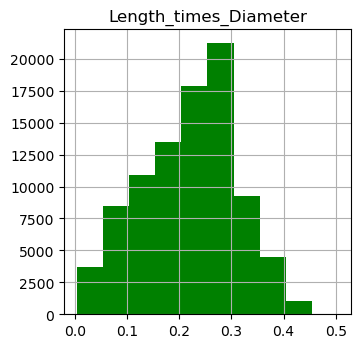

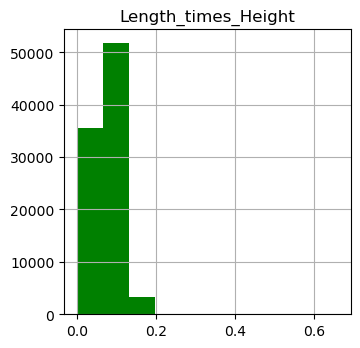

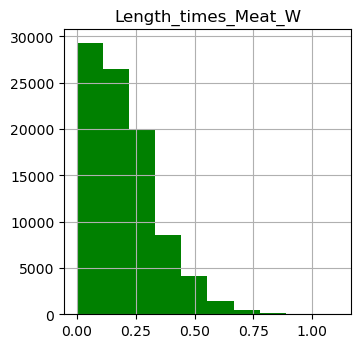

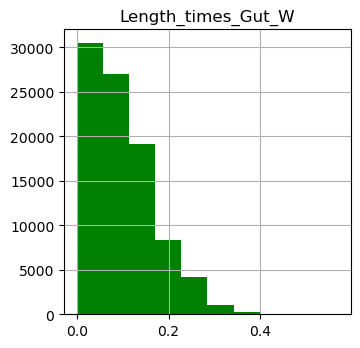

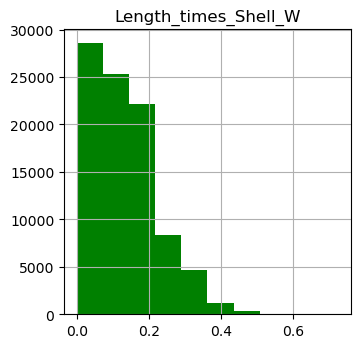

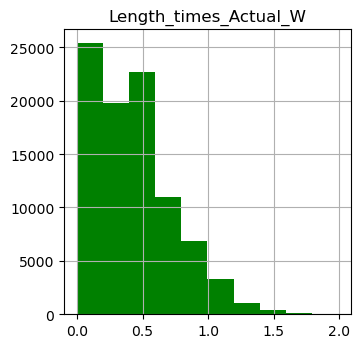

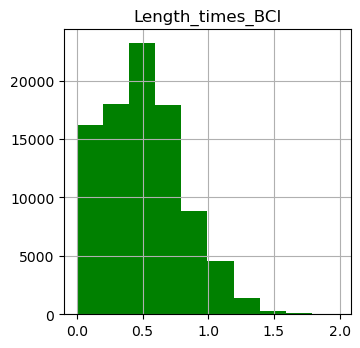

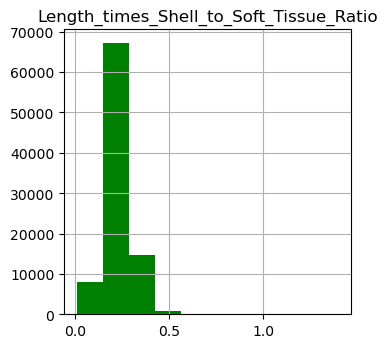

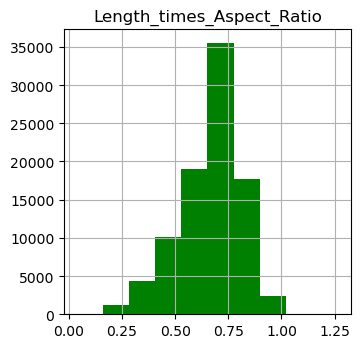

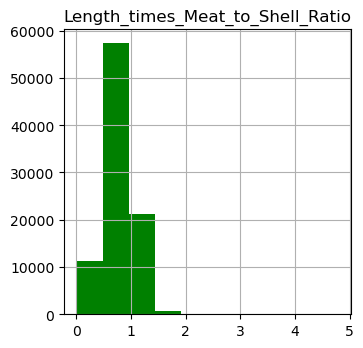

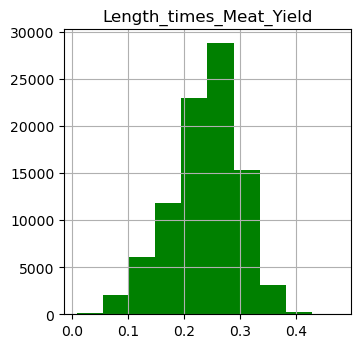

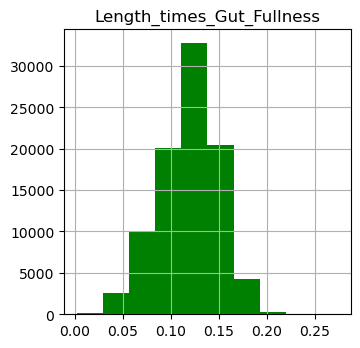

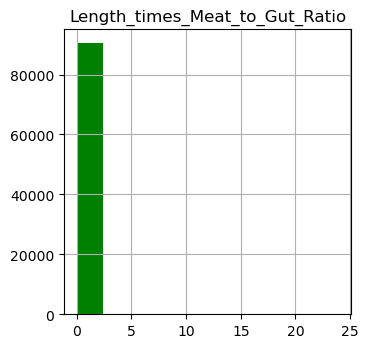

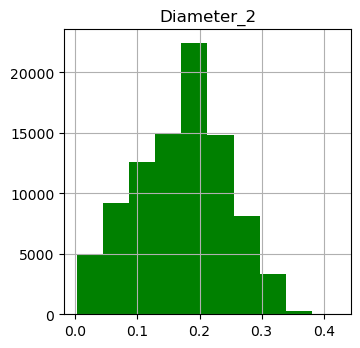

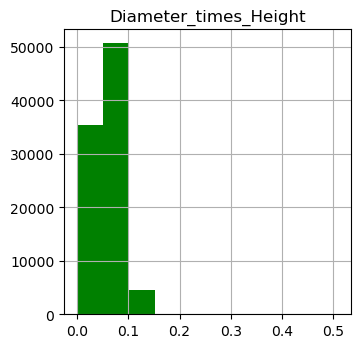

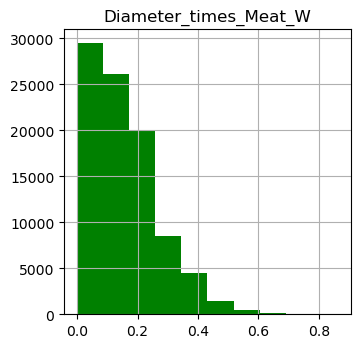

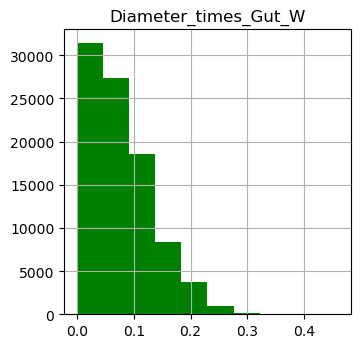

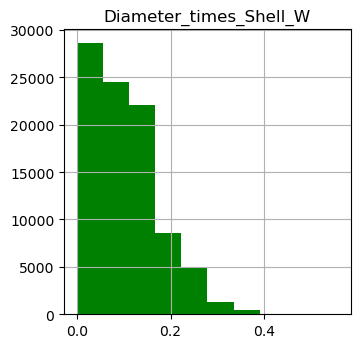

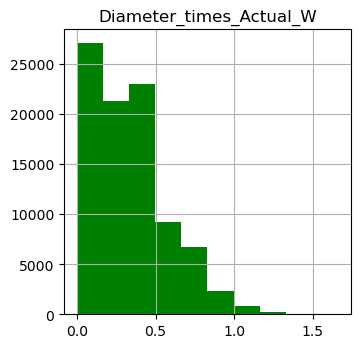

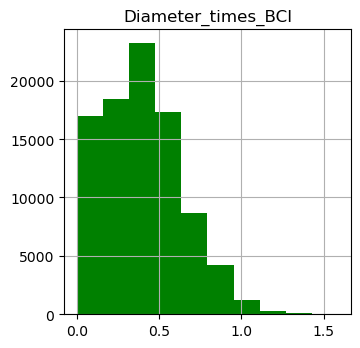

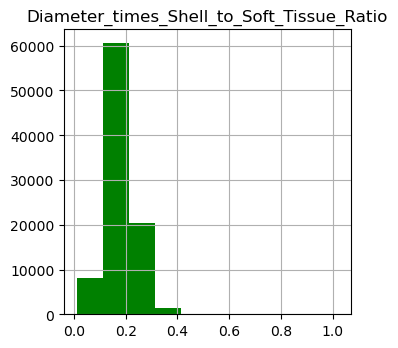

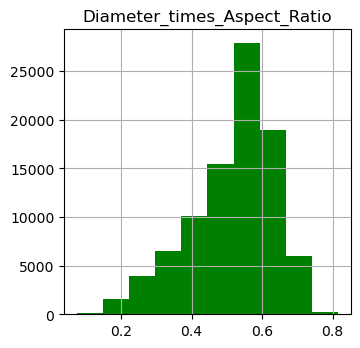

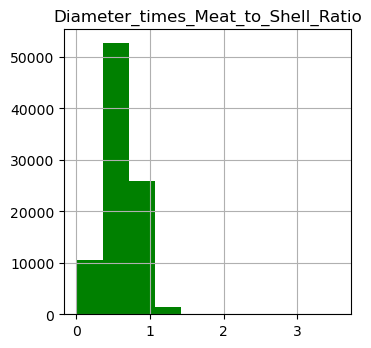

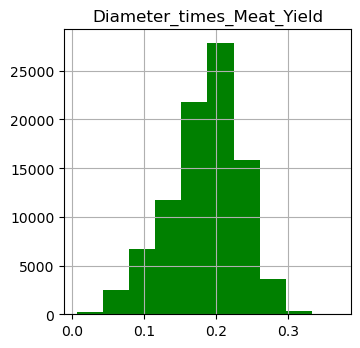

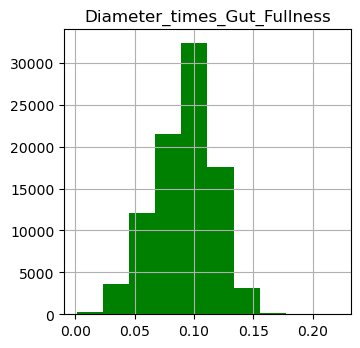

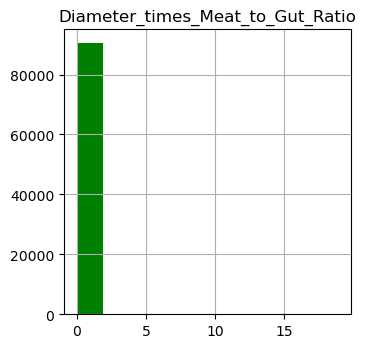

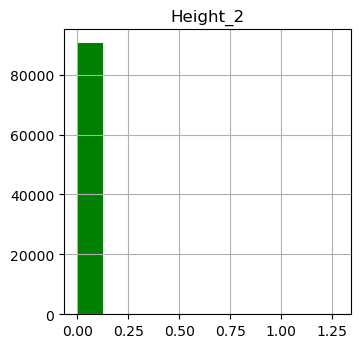

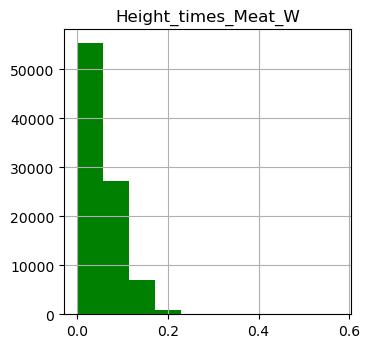

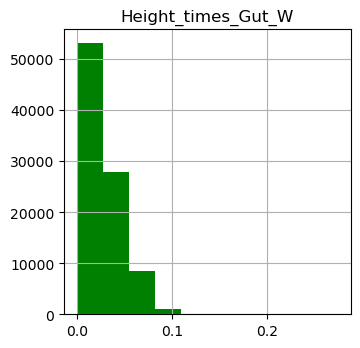

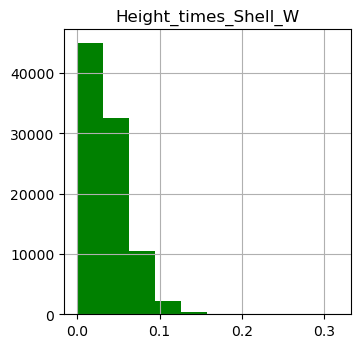

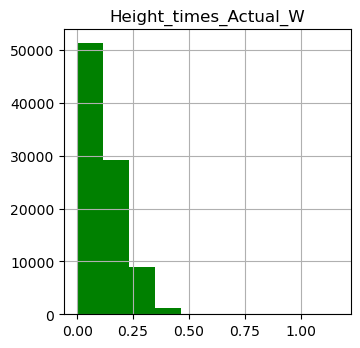

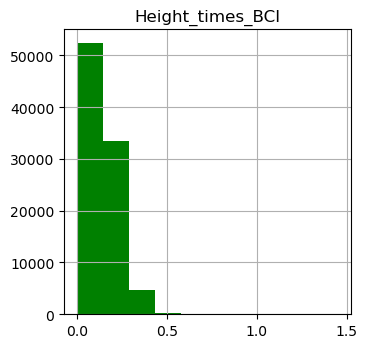

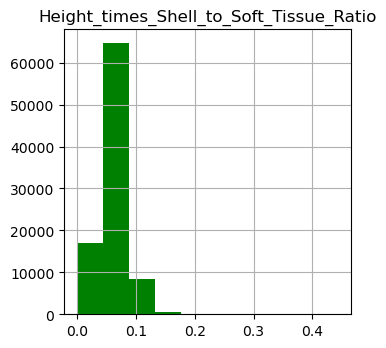

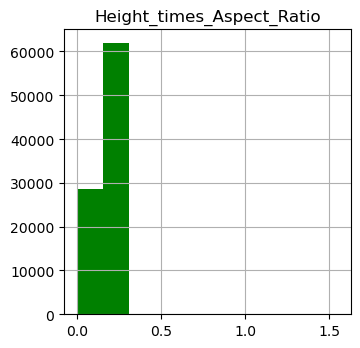

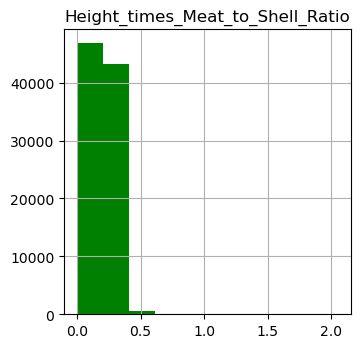

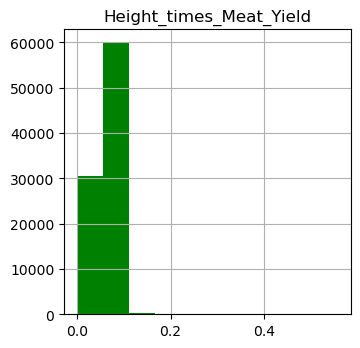

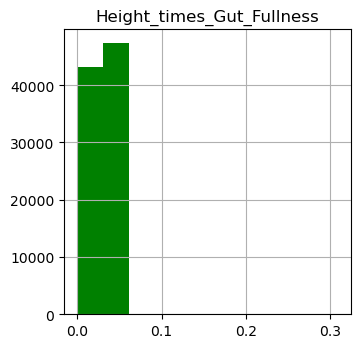

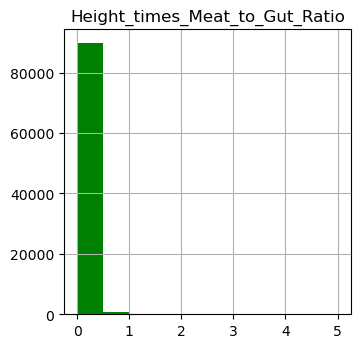

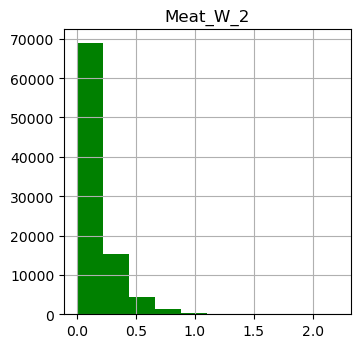

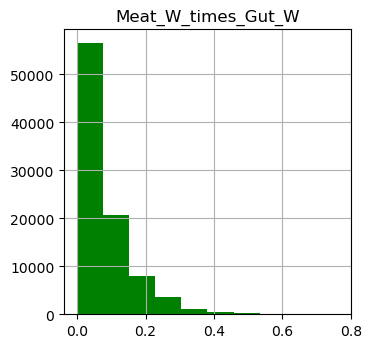

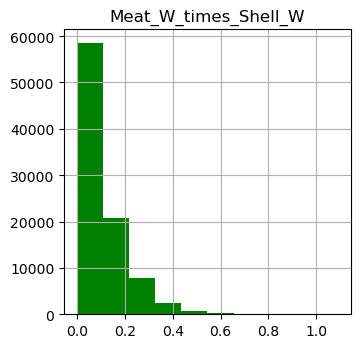

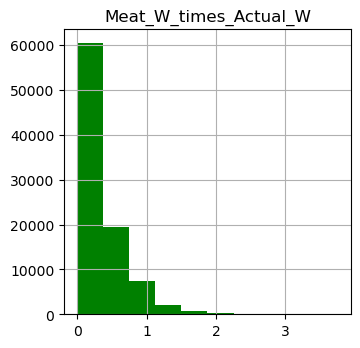

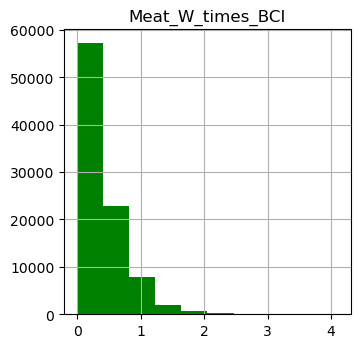

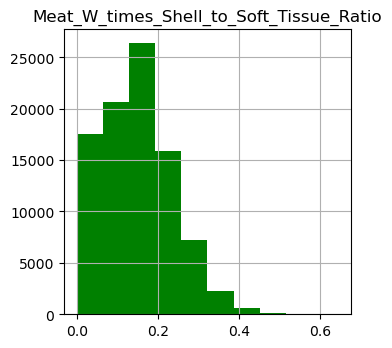

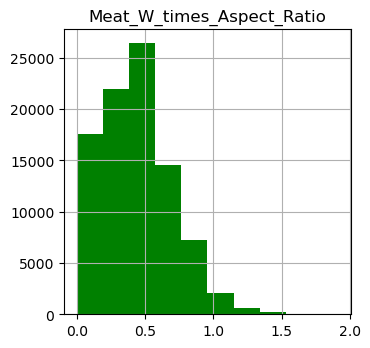

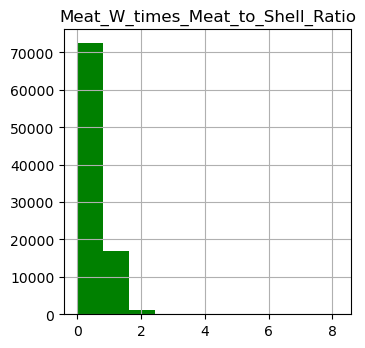

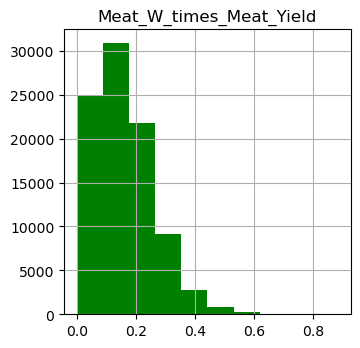

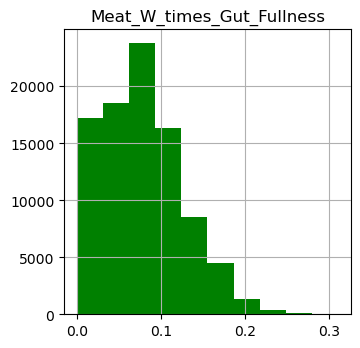

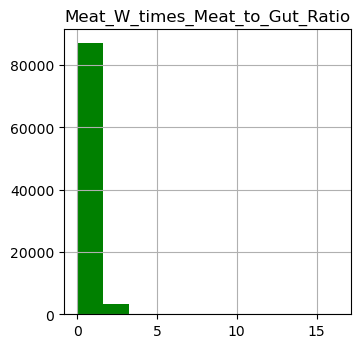

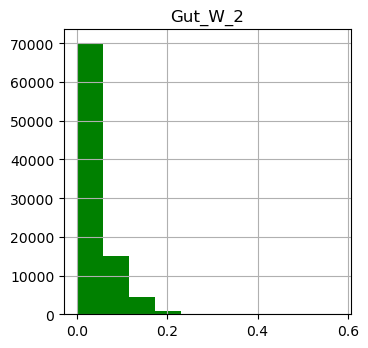

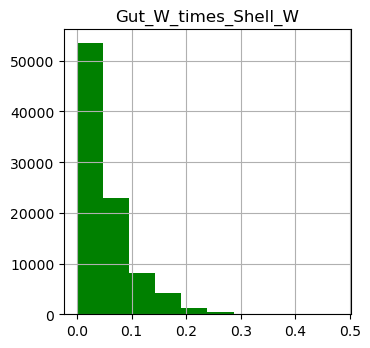

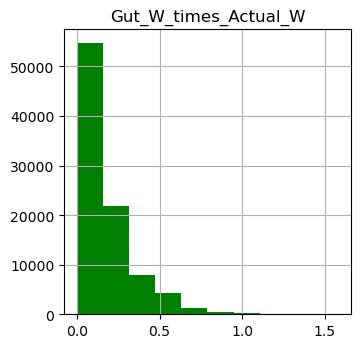

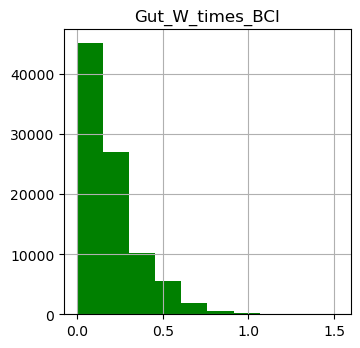

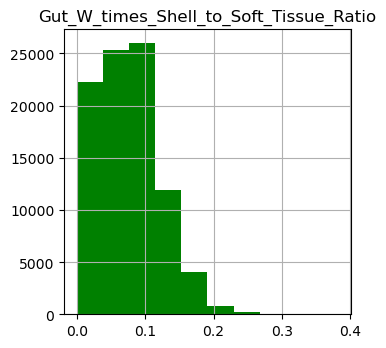

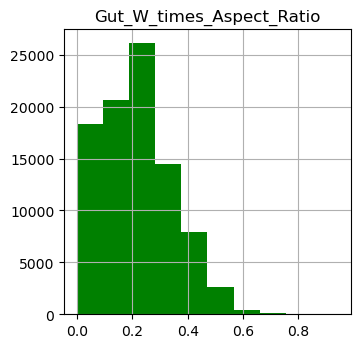

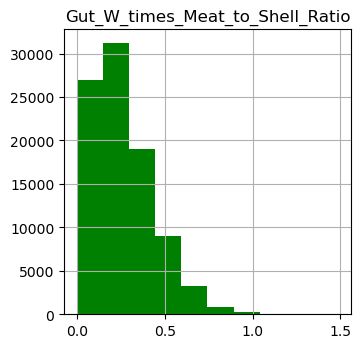

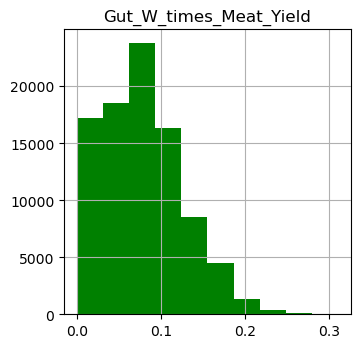

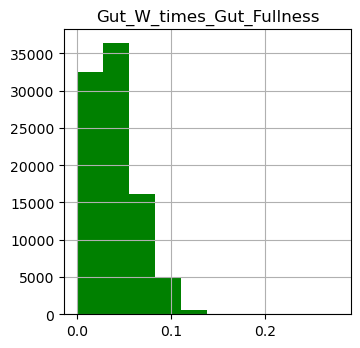

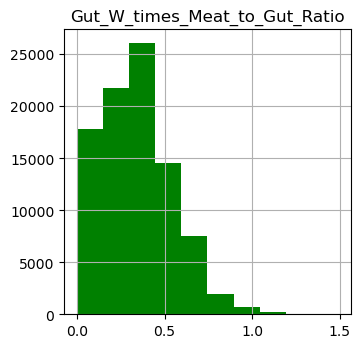

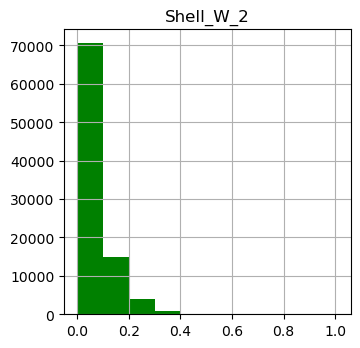

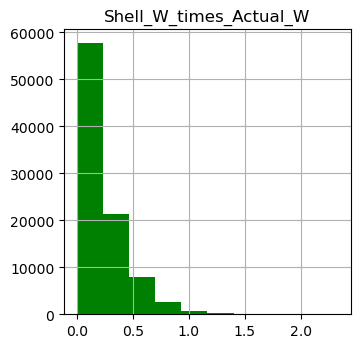

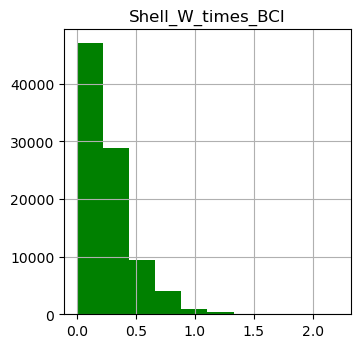

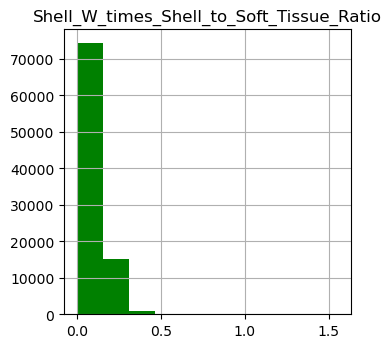

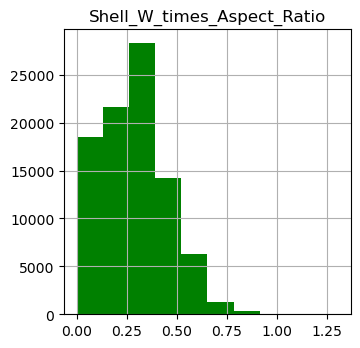

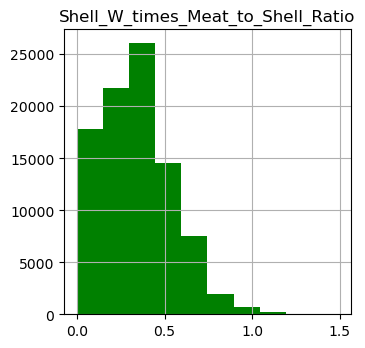

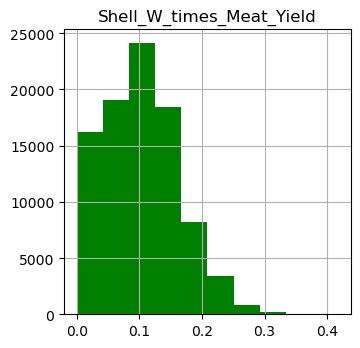

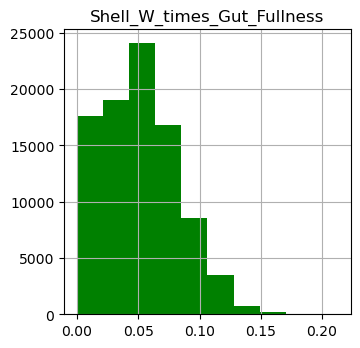

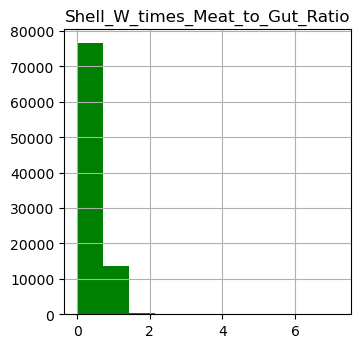

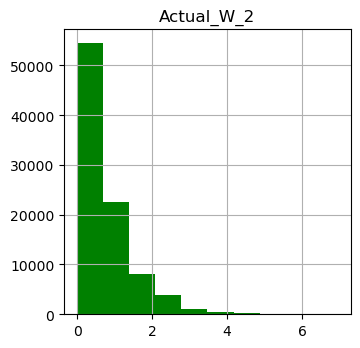

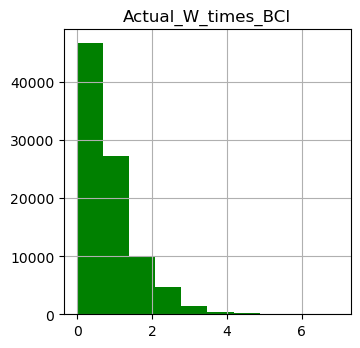

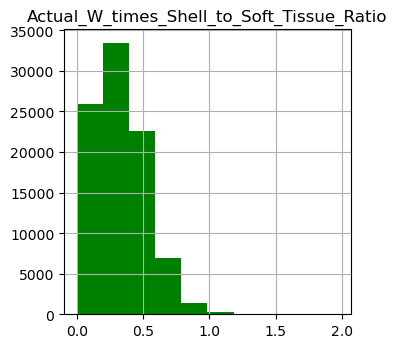

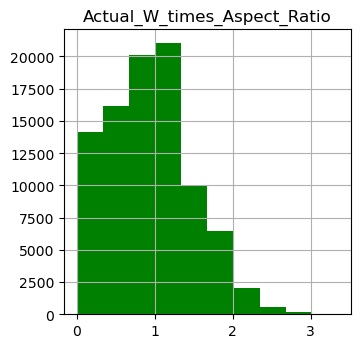

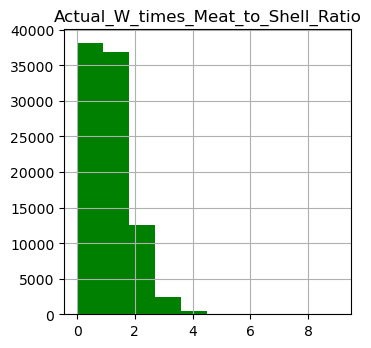

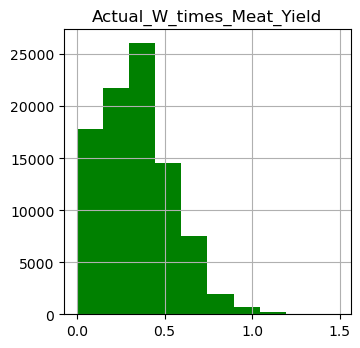

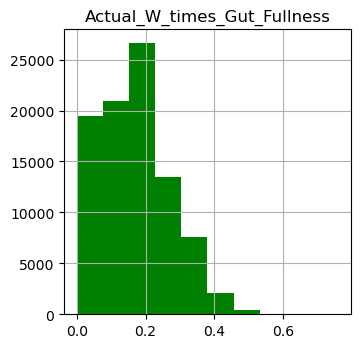

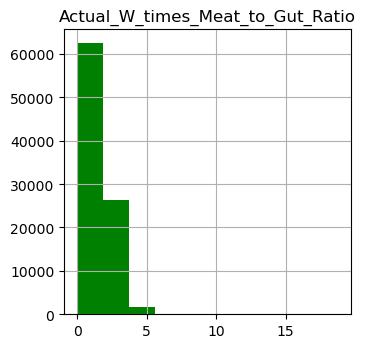

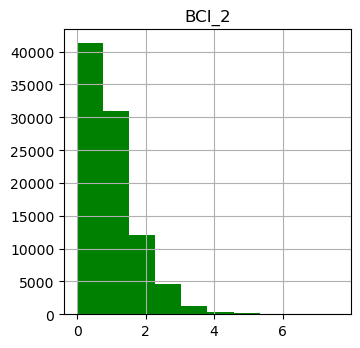

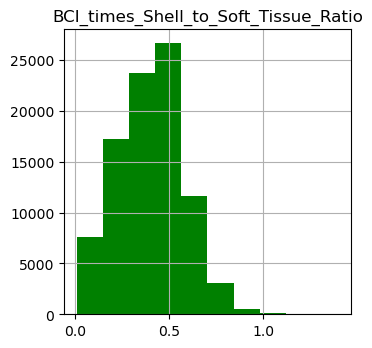

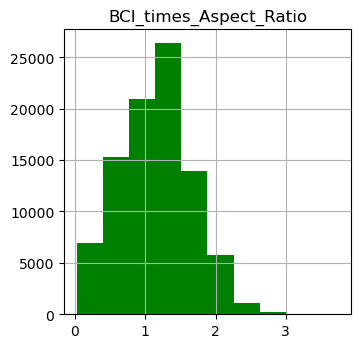

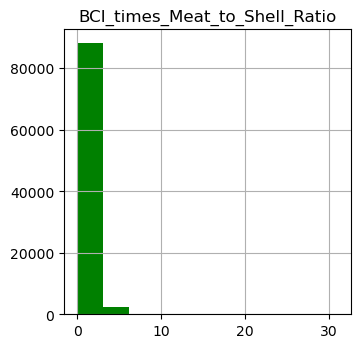

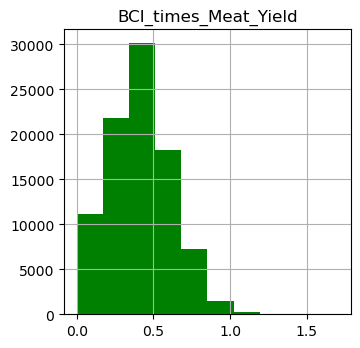

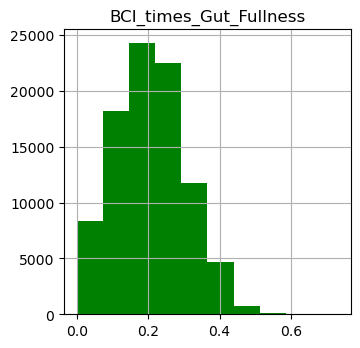

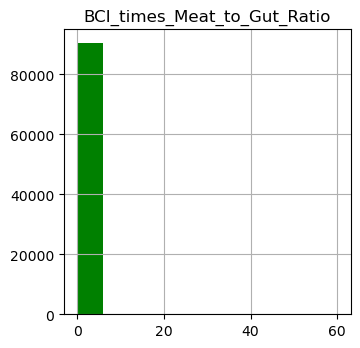

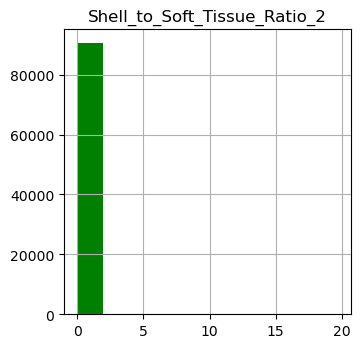

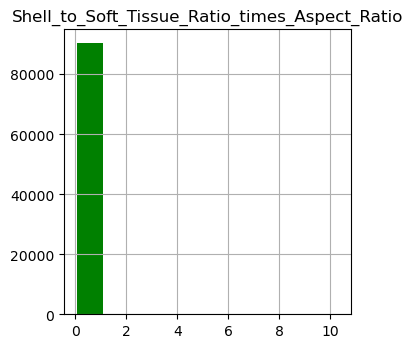

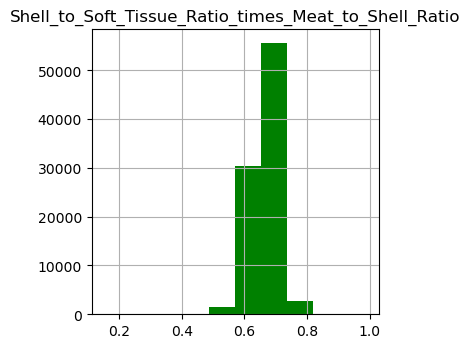

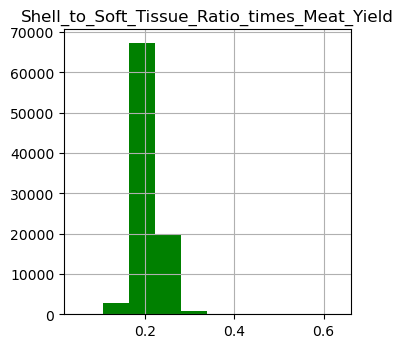

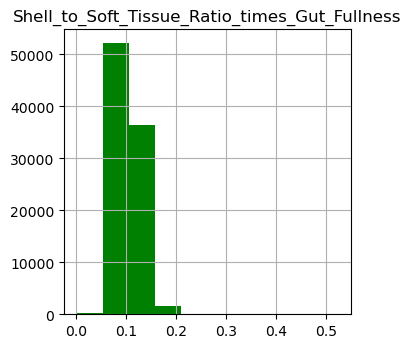

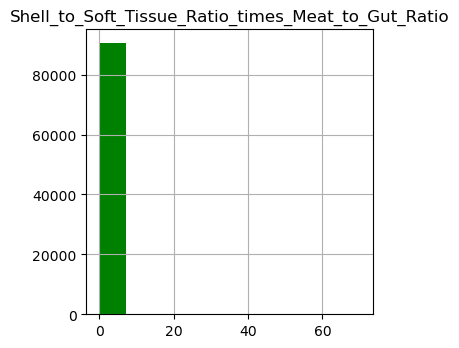

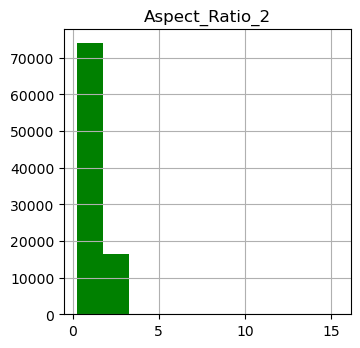

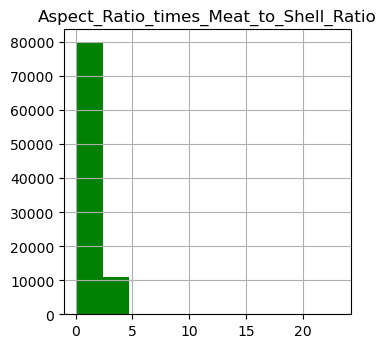

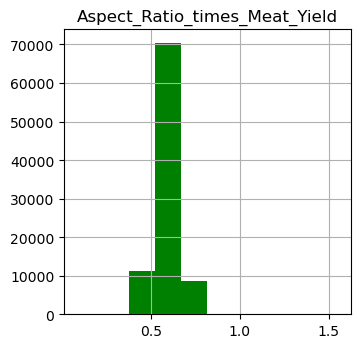

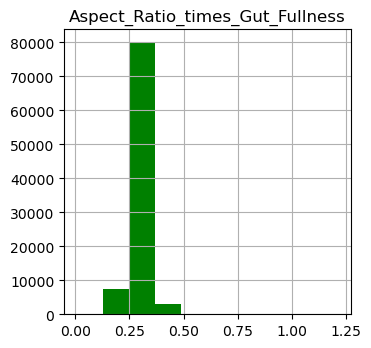

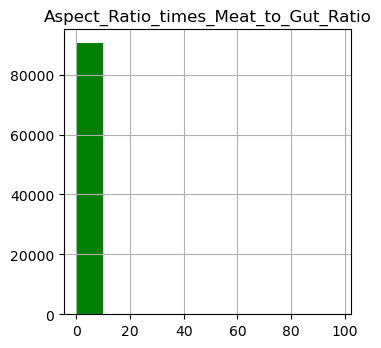

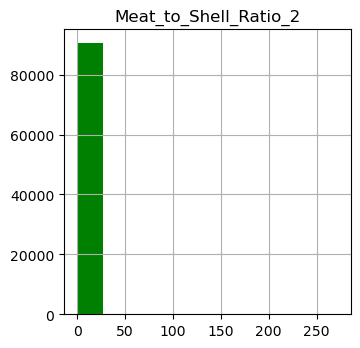

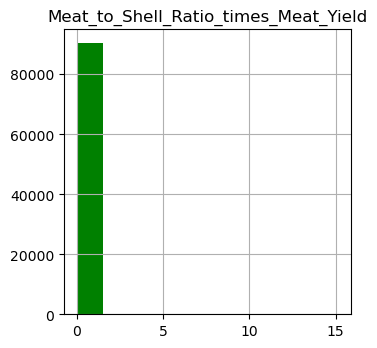

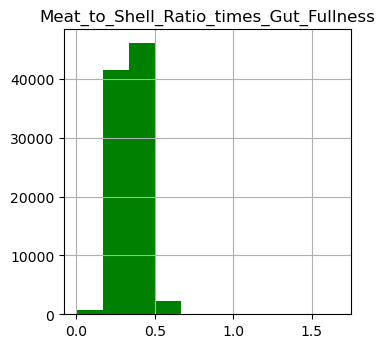

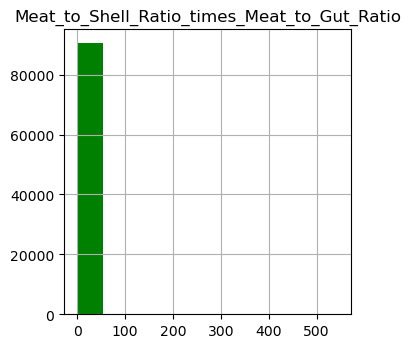

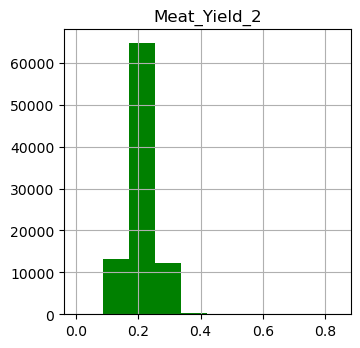

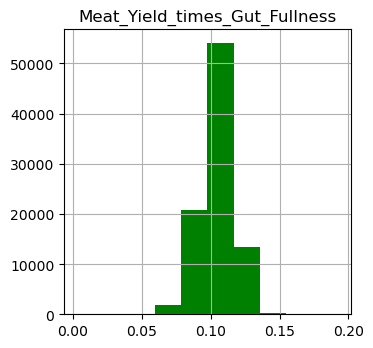

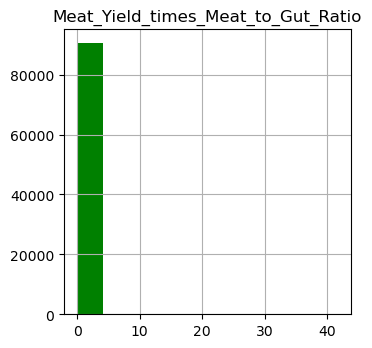

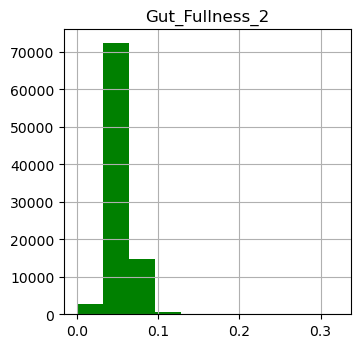

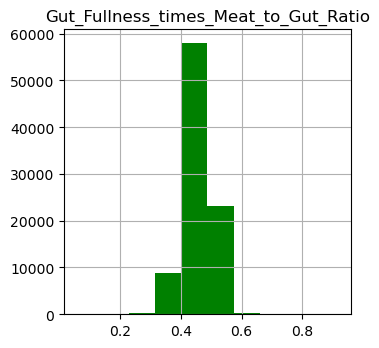

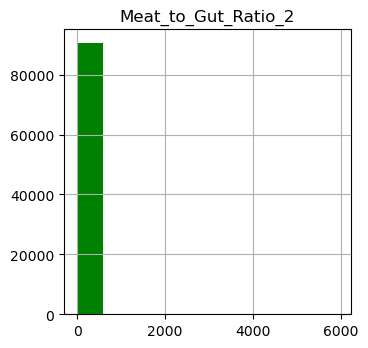

In [179]:
for x in list(train_x.columns):
    plt.figure(figsize=(3.7,3.7))
    train_x[x].hist(color = 'green')
    plt.title(x)
    plt.show()

In [22]:
train_x = train_2
train_y = train['Rings']
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.20, random_state = 42)


In [154]:

# X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.20, random_state = 42)

# model = KNeighborsRegressor(60)
# model.fit(train_x, train_y)
# y_pred = model.predict(train_x)
# print(RMSLE(train_y, y_pred))
# mse_base = mean_squared_error(train_y, y_pred)
# print("Mean Squared Error:", mse)

In [155]:
len(train_x.columns)

9

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from scipy.stats import randint

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(100, 1000),  # Random integer values between 100 and 1000
    'learning_rate': [0.01, 0.1, 1],  # Fixed values
    'depth': randint(3, 8),  # Random integer values between 3 and 7
    'subsample': [0.8, 0.9, 1.0],  # Fixed values
    'colsample_bylevel': [0.6, 0.7, 0.8],  # Fixed values
    'random_strength': randint(5, 8),  # Random integer values between 5 and 7
    'min_data_in_leaf': randint(50, 150),  # Random integer values between 50 and 150
    'verbose': [0]  # Fixed value
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=CatBoostRegressor(),
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=2,  # Number of folds for cross-validation
    scoring='neg_mean_squared_error',  # Use the appropriate scoring metric
    verbose=2,
    n_jobs=-2  # Utilize all available CPU cores
)

# Fit the RandomizedSearchCV object
random_search.fit(train_x, train_y)  # Replace X and y with your data

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters:", best_params)


Fitting 2 folds for each of 100 candidates, totalling 200 fits
Best parameters: {'colsample_bylevel': 0.7, 'depth': 6, 'learning_rate': 0.1, 'min_data_in_leaf': 123, 'n_estimators': 641, 'random_strength': 5, 'subsample': 1.0, 'verbose': 0}


In [23]:
from catboost import CatBoostRegressor

# Define the parameters from param_dist
colsample_bylevel = 0.7
depth = 6
learning_rate = 0.1
min_data_in_leaf = 123
n_estimators = 641
random_strength = 5
subsample = 1.0
verbose = 0

# Create a CatBoostRegressor model with the specified parameters
model = CatBoostRegressor(
    colsample_bylevel=colsample_bylevel,
    depth=depth,
    learning_rate=learning_rate,
    min_data_in_leaf=min_data_in_leaf,
    n_estimators=n_estimators,
    random_strength=random_strength,
    subsample=subsample,
    verbose=verbose
)

# Fit the model to your training data
model.fit(train_x, train_y)  # Replace train_x and train_y with your data
# Test Pred
y_pred = model.predict(X_test)
# Submission DF
print(RMSLE(y_test, y_pred))
mse_base = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

0.15603729136192843


NameError: name 'mse' is not defined

In [24]:
model.fit(train_x, train_y) 

#### XGBoost

In [266]:
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(RMSLE(y_test, y_pred))

0.15783638783774254


In [ ]:
cat_params = {
     'n_estimators': 853,
     'learning_rate': 0.10899577626375372,
     'depth': 7,
     'subsample': 0.998357427917925,
     'colsample_bylevel': 0.7340962061535496,
     'random_strength': 6.262882561405091,
     'min_data_in_leaf': 92,
    'verbose' : 0
             } 

### TEST

In [151]:
test_df = pd.read_csv(r'C:\Users\archi\OneDrive\Desktop\Python Projects\Albone Dataset\test.csv')
test_df.columns = ['id', 'Sex', 'Length', 'Diameter', 'Height', 'Total_W', 'Meat_W', 'Gut_W', 'Shell_W']
test_df['Actual_W'] = test_df['Meat_W'] + test_df['Gut_W'] + test_df['Shell_W']


In [152]:
test_df = test_df.drop(['Sex', 'id', 'Total_W'], axis = 1)

In [153]:
test_df

,Length,Diameter,Height,Meat_W,Gut_W,Shell_W,Actual_W
0,0.645,0.475,0.155,0.6185,0.3125,0.3005,1.2315
1,0.580,0.460,0.160,0.4785,0.2195,0.2750,0.9730
2,0.560,0.420,0.140,0.3525,0.1845,0.2405,0.7775
3,0.570,0.490,0.145,0.3525,0.1865,0.2350,0.7740
4,0.415,0.325,0.110,0.1575,0.0670,0.1050,0.3295
...,...,...,...,...,...,...,...
60406,0.345,0.260,0.085,0.0735,0.0265,0.0500,0.1500
60407,0.525,0.410,0.145,0.3885,0.1670,0.2050,0.7605
60408,0.590,0.440,0.155,0.3930,0.2000,0.2650,0.8580
60409,0.660,0.525,0.190,0.5885,0.3575,0.4350,1.3810


In [171]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_2 = scaler.fit_transform(test_df)
test_2 = pd.DataFrame(test_2, columns=test_df.columns)

In [173]:
pca = PCA(n_components = 1).fit_transform(test_2)
#print(pca.explained_variance_ratio_)
test_2['PC_1'] = pca[:,0]

In [175]:
test_2 = test_2['PC_1']

In [176]:
test_2

0        2.597308
1        1.459390
2        0.404763
3        0.746085
4       -2.324694
           ...   
60406   -3.674257
60407    0.182620
60408    1.000897
60409    3.817921
60410   -2.078802
Name: PC_1, Length: 60411, dtype: float64

In [ ]:
us_house_reg 

In [183]:
pred_data = test_df.assign(Rings = us_house_reg.predict(test_2))

In [185]:
pred_data

,Length,Diameter,Height,Meat_W,Gut_W,Shell_W,Actual_W,Rings
0,0.645,0.475,0.155,0.6185,0.3125,0.3005,1.2315,12.281166
1,0.580,0.460,0.160,0.4785,0.2195,0.2750,0.9730,11.148916
2,0.560,0.420,0.140,0.3525,0.1845,0.2405,0.7775,10.099541
3,0.570,0.490,0.145,0.3525,0.1865,0.2350,0.7740,10.439163
4,0.415,0.325,0.110,0.1575,0.0670,0.1050,0.3295,7.383678
...,...,...,...,...,...,...,...,...
60406,0.345,0.260,0.085,0.0735,0.0265,0.0500,0.1500,6.040837
60407,0.525,0.410,0.145,0.3885,0.1670,0.2050,0.7605,9.878505
60408,0.590,0.440,0.155,0.3930,0.2000,0.2650,0.8580,10.692706
60409,0.660,0.525,0.190,0.5885,0.3575,0.4350,1.3810,13.495700


In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

test_poly = poly.fit_transform(test_df)

# Get the names of the new polynomial features
feature_names_poly = poly.get_feature_names(cols)
test_x = pd.DataFrame(test_poly, columns = feature_names_poly)

In [29]:
new_list = []
for x in list(test_x.columns):
    x = x.replace(" ","_times_")
    x = x.replace("^", "_")
    new_list.append(x)
    
test_x.columns = new_list
test_x.head()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_2 = scaler.fit_transform(test_x)
test_2 = pd.DataFrame(test_2, columns=test_x.columns)

In [30]:
test_x = test_2
test_x

,Length,Diameter,Height,Meat_W,Gut_W,Shell_W,Actual_W,Length_2,Length_times_Diameter,Length_times_Height,...,Meat_W_2,Meat_W_times_Gut_W,Meat_W_times_Shell_W,Meat_W_times_Actual_W,Gut_W_2,Gut_W_times_Shell_W,Gut_W_times_Actual_W,Shell_W_2,Shell_W_times_Actual_W,Actual_W_2
0,1.084723,0.749354,0.504236,1.357724,1.420584,0.572887,1.164304,1.190845,0.963901,0.778435,...,1.289086,1.424470,0.822444,1.198254,1.435176,0.852279,1.273008,0.316993,0.679517,1.074415
1,0.532038,0.595458,0.635213,0.672186,0.497228,0.376469,0.555946,0.485654,0.525657,0.560743,...,0.406836,0.340200,0.294508,0.363197,0.227760,0.192884,0.273358,0.108509,0.215890,0.302526
2,0.361982,0.185071,0.111303,0.055201,0.149729,0.110728,0.095853,0.283728,0.175726,0.123841,...,-0.194654,-0.151183,-0.160856,-0.176897,-0.117313,-0.121448,-0.135938,-0.144150,-0.148649,-0.161021
3,0.447010,0.903249,0.242280,0.055201,0.169586,0.068363,0.087616,0.383805,0.664079,0.252788,...,-0.194654,-0.142521,-0.179716,-0.180377,-0.099205,-0.132157,-0.130672,-0.181304,-0.171714,-0.168376
4,-0.870931,-0.789599,-0.674563,-0.899656,-1.016876,-0.932982,-0.958478,-0.968345,-0.935249,-0.869808,...,-0.765951,-0.820586,-0.824659,-0.803461,-0.838484,-0.855414,-0.844349,-0.809231,-0.838006,-0.832775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60406,-1.466130,-1.456479,-1.329452,-1.310979,-1.418982,-1.356628,-1.380917,-1.439506,-1.435506,-1.365115,...,-0.877419,-0.926306,-0.949781,-0.918724,-0.930896,-0.967660,-0.950002,-0.930342,-0.960584,-0.949359
60407,0.064382,0.082474,0.242280,0.231483,-0.024021,-0.162716,0.055844,-0.052594,-0.045195,0.054816,...,-0.041412,-0.153109,-0.210795,-0.116587,-0.267428,-0.320724,-0.231924,-0.368829,-0.289271,-0.196436
60408,0.617067,0.390265,0.504236,0.253518,0.303622,0.299443,0.285303,0.589274,0.445926,0.519783,...,-0.021210,0.015465,0.027556,0.001126,0.028129,0.048154,0.028372,0.031794,0.034019,0.017312
60409,1.212266,1.262338,1.421080,1.210823,1.867368,1.608894,1.516140,1.364209,1.408236,1.549841,...,1.081076,1.634658,1.504725,1.342184,2.170958,2.063319,1.908412,1.722368,1.722971,1.603448


In [31]:
y_pred = model.predict(test_x)

In [32]:
test_x['Rings'] = y_pred

In [245]:
len(test_df.columns)

23

In [257]:
test_df['Rings'] = model.predict(test_df)

In [186]:
df = pd.read_csv(r'C:\Users\archi\OneDrive\Desktop\Python Projects\Albone Dataset\test.csv')

In [187]:
df = df['id']

In [188]:
final = pd.concat([df , pred_data['Rings']], axis = 1)

In [189]:
final.to_csv('res_8.csv', index = False)

In [385]:
len(final)

90615

In [386]:
final

,id,Rings
0,90615.0,10.158907
1,90616.0,10.531224
2,90617.0,4.016105
3,90618.0,9.859102
4,90619.0,8.681478
...,...,...
90610,NaN,6.321700
90611,NaN,9.623831
90612,NaN,7.236350
90613,NaN,6.917391
